In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('bike_sharing.csv')
df.drop(df.columns[-1], axis=1, inplace=True)

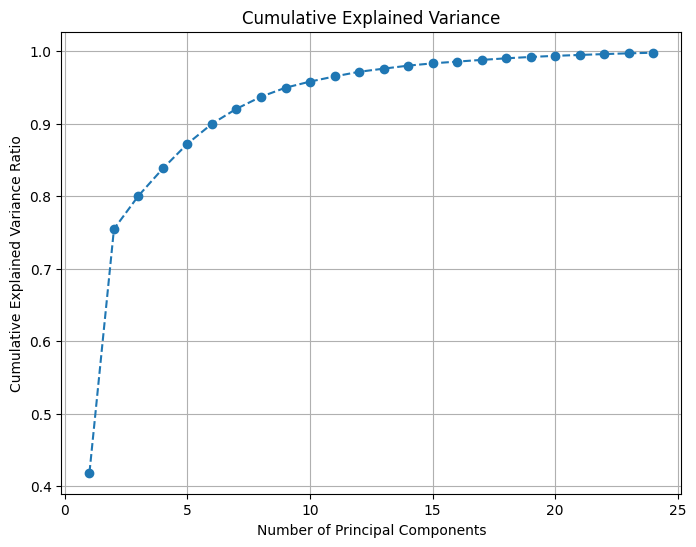

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


pca = PCA(n_components=24)
X_pca = pca.fit_transform(scaled_data)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

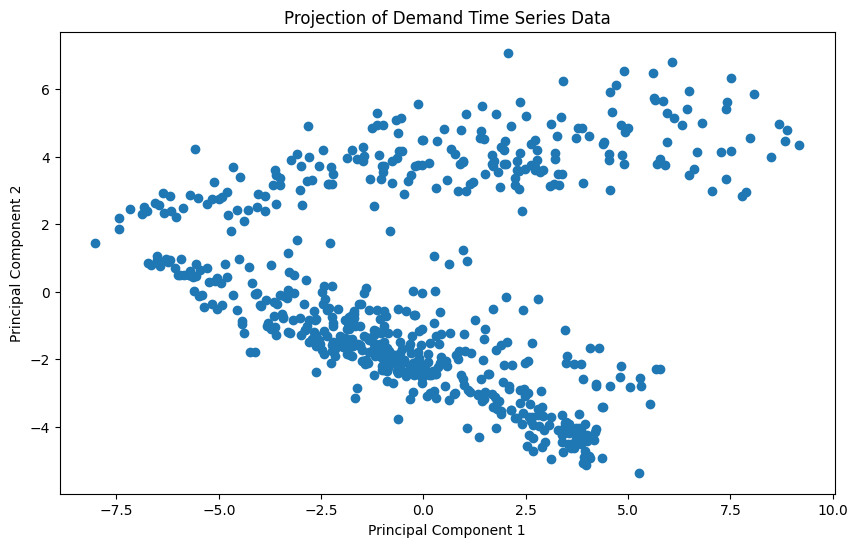

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Demand Time Series Data')
plt.show()


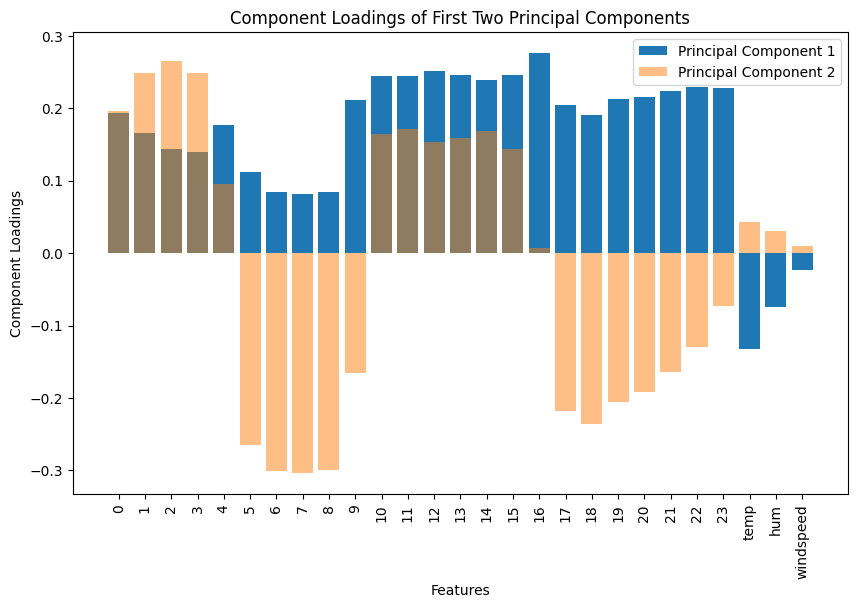

In [6]:
# Assuming pca is your fitted PCA object
components_df = pd.DataFrame(data=pca.components_[:2], columns=df.columns)

# Plot the loadings of the first two principal components as bar graphs
plt.figure(figsize=(10, 6))
plt.bar(range(len(components_df.columns)), components_df.iloc[0], label='Principal Component 1')
plt.bar(range(len(components_df.columns)), components_df.iloc[1], label='Principal Component 2', alpha=0.5)
plt.xticks(range(len(components_df.columns)), components_df.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Component Loadings')
plt.title('Component Loadings of First Two Principal Components')
plt.legend()
plt.show()

C:\Users\fenst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


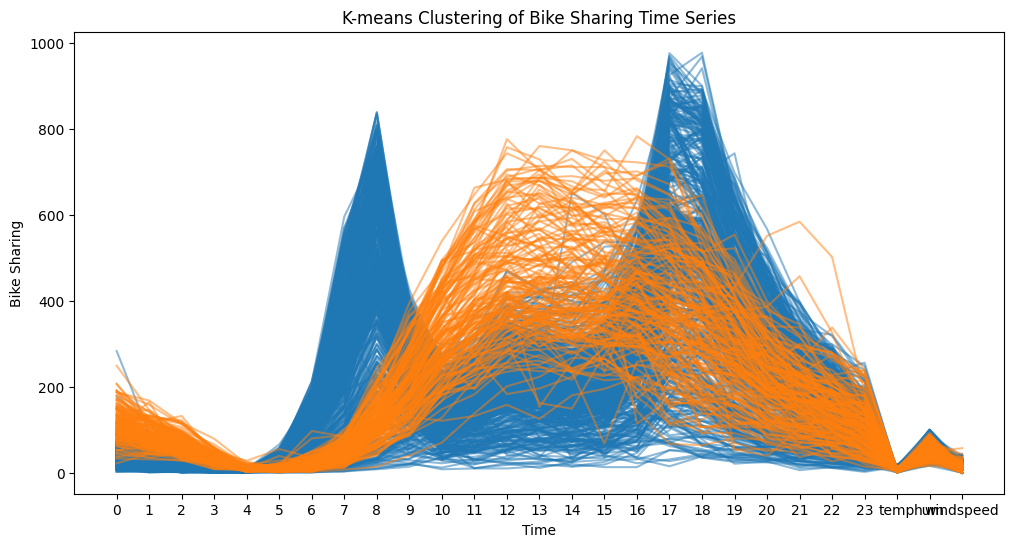

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=8)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

#selected_features = df.iloc[:, :24]

plt.figure(figsize=(12, 6))

# Plot data points color-coded by cluster
for cluster in range(2):
    cluster_data = df[cluster_labels == cluster]
    plt.plot(cluster_data.T, color='C{}'.format(cluster), alpha=0.5, label='Cluster {}'.format(cluster + 1))

plt.xlabel('Time')
plt.ylabel('Bike Sharing')
plt.title('K-means Clustering of Bike Sharing Time Series')
#plt.legend()
plt.show()

C:\Users\fenst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


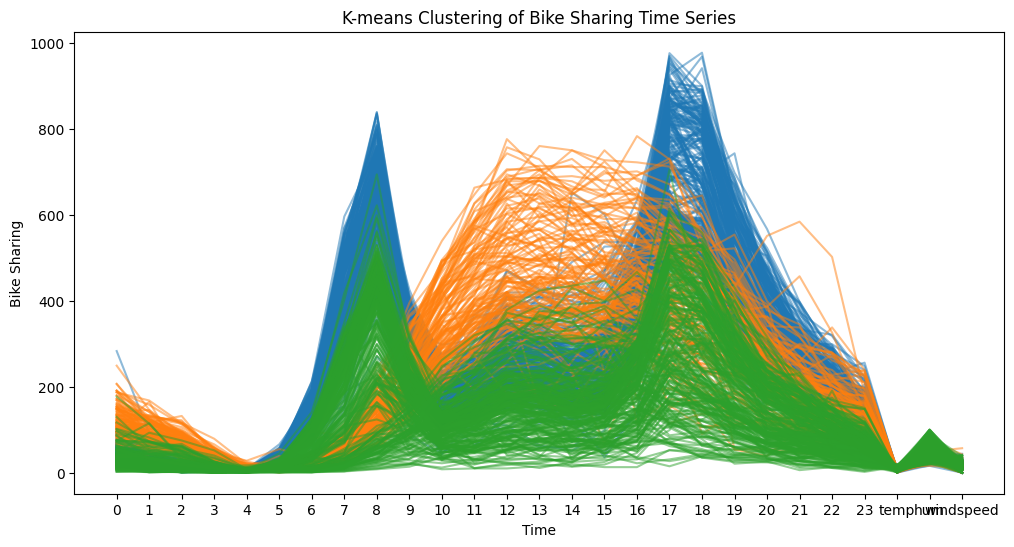

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=8)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

#selected_features = df.iloc[:, :24]

plt.figure(figsize=(12, 6))

# Plot data points color-coded by cluster
for cluster in range(3):
    cluster_data = df[cluster_labels == cluster]
    plt.plot(cluster_data.T, color='C{}'.format(cluster), alpha=0.5, label='Cluster {}'.format(cluster + 1))

plt.xlabel('Time')
plt.ylabel('Bike Sharing')
plt.title('K-means Clustering of Bike Sharing Time Series')
#plt.legend()
plt.show()

In [ ]:
# Split the data based on cluster assignments
cluster_1_data = df[cluster_labels == 0]
cluster_2_data = df[cluster_labels == 1]
cluster_3_data = df[cluster_labels == 2]

# Plot each cluster's time series in separate plots
plt.figure(figsize=(12, 8))

# Plot cluster 1 data
plt.subplot(3, 1, 1)
plt.plot(cluster_1_data.iloc[:, :24].T, alpha=0.5)
plt.title('Cluster 1 Time Series (Features 0-23)')
plt.xlabel('Time')
plt.ylabel('Bike Sharing')

# Print the data associated with features beyond 23 for cluster 1
print("Cluster 1 Data (Features beyond 23):")
print(cluster_1_data.iloc[:, 24:])
data1=cluster_1_data.iloc[:, 24:]

# Plot cluster 2 data
plt.subplot(3, 1, 2)
plt.plot(cluster_2_data.iloc[:, :24].T, alpha=0.5)
plt.title('Cluster 2 Time Series (Features 0-23)')
plt.xlabel('Time')
plt.ylabel('Bike Sharing')

# Print the data associated with features beyond 23 for cluster 2
print("\nCluster 2 Data (Features beyond 23):")
print(cluster_2_data.iloc[:, 24:])
data2=cluster_2_data.iloc[:, 24:]
# Plot cluster 3 data
plt.subplot(3, 1, 3)
plt.plot(cluster_3_data.iloc[:, :24].T, alpha=0.5)
plt.title('Cluster 3 Time Series (Features 0-23)')
plt.xlabel('Time')
plt.ylabel('Bike Sharing')

# Print the data associated with features beyond 23 for cluster 3
print("\nCluster 3 Data (Features beyond 23):")
print(cluster_3_data.iloc[:, 24:])
data3 = cluster_3_data.iloc[:, 24:]
plt.tight_layout()
plt.show()

In [ ]:
# find average temp, wind speed, humidity for each cluster

print("Cluster 1 Data (Features beyond 23):")
print(data1.mean())
print("\nCluster 2 Data (Features beyond 23):")
print(data2.mean())
print("\nCluster 3 Data (Features beyond 23):")
print(data3.mean())


